In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
from tensorflow.contrib.layers import fully_connected, batch_norm
import math
import numpy as np
import random

In [8]:
df = pd.read_csv('./DL_final_project/DL_Taiwan_data/sinica/201701_Taiwan.csv')
#把201701_Taiwan.csv的header的' lat',' lon'改成'lat','lon' (多了空格)

In [9]:
df

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
1,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
2,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
3,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
4,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
5,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
6,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
7,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
8,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
9,2017-01-01,08:00:01,74DA3895E03E,70.0,87.0,52.0,23.50,85.0,22.853,120.546


In [10]:
df.shape

(4930367, 10)

In [11]:
df.columns

Index(['Date', 'Time', 'device_id', 'PM2.5', 'PM10', 'PM1', 'Temperature',
       'Humidity', 'lat', 'lon'],
      dtype='object')

In [38]:
df.describe()

,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,Hour
count,4.930367e+06,4.930367e+06,4.930367e+06,4.930367e+06,4.930367e+06,4.930367e+06,4.930367e+06,4.930367e+06
mean,3.928663e+01,3.953109e+01,2.208962e+01,2.300610e+01,7.419153e+01,2.452613e+01,1.198064e+02,1.159325e+01
std,2.179786e+01,3.328340e+01,1.807062e+01,4.480626e+00,1.625606e+01,3.994624e+00,1.624134e+01,6.873959e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-4.500000e+01,0.000000e+00,-3.788800e+01,-1.141540e+02,0.000000e+00
25%,2.400000e+01,0.000000e+00,0.000000e+00,2.075000e+01,6.500000e+01,2.308600e+01,1.203650e+02,6.000000e+00
50%,3.900000e+01,4.100000e+01,2.400000e+01,2.350000e+01,7.500000e+01,2.417200e+01,1.206690e+02,1.200000e+01
75%,5.200000e+01,6.500000e+01,3.400000e+01,2.587000e+01,8.500000e+01,2.503500e+01,1.214510e+02,1.800000e+01
max,4.864000e+03,1.671000e+03,6.660000e+02,5.150000e+01,1.440000e+02,9.000000e+01,1.800000e+02,2.300000e+01


In [13]:
df[['lat', 'lon']]

,lat,lon
0,25.072,121.657
1,22.963,120.325
2,25.072,121.657
3,22.963,120.325
4,25.072,121.657
5,22.963,120.325
6,24.167,120.692
7,24.167,120.692
8,24.167,120.692
9,22.853,120.546


In [14]:
need_rows = 100000
# pd.options.display.max_rows=1000
dfs = df.head(need_rows)
df.head(need_rows)

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
1,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
2,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
3,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
4,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657
5,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325
6,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
7,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
8,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692
9,2017-01-01,08:00:01,74DA3895E03E,70.0,87.0,52.0,23.50,85.0,22.853,120.546


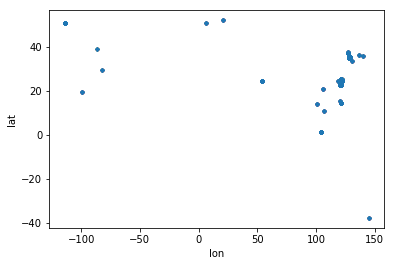

In [15]:
ax1 = dfs.plot.scatter(x='lon', y='lat', s=5)
plt.show(ax1)

In [16]:
#df2 = df[['Date','Time']].head(10)
#df2 = df2.assign(Timestamp = pd.to_datetime(df2['Date']+' '+df2['Time']))
#df2 = df2.assign(Hour = df2['Timestamp'].dt.hour)
#df2

In [17]:
df = df.assign(Timestamp = pd.to_datetime(df['Date']+' '+df['Time']))
df = df.assign(Hour = df['Timestamp'].dt.hour)
df

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,Timestamp,Hour
0,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657,2017-01-01 08:00:00,8
1,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325,2017-01-01 08:00:00,8
2,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657,2017-01-01 08:00:00,8
3,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325,2017-01-01 08:00:00,8
4,2017-01-01,08:00:00,74DA388FF60A,31.0,33.0,22.0,22.75,78.0,25.072,121.657,2017-01-01 08:00:00,8
5,2017-01-01,08:00:00,74DA3895DF64,59.0,76.0,40.0,21.25,92.0,22.963,120.325,2017-01-01 08:00:00,8
6,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692,2017-01-01 08:00:01,8
7,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692,2017-01-01 08:00:01,8
8,2017-01-01,08:00:01,74DA3895C20A,39.0,46.0,28.0,23.62,77.0,24.167,120.692,2017-01-01 08:00:01,8
9,2017-01-01,08:00:01,74DA3895E03E,70.0,87.0,52.0,23.50,85.0,22.853,120.546,2017-01-01 08:00:01,8


In [18]:
df_X = df[['Hour','PM10','PM1','Temperature','Humidity','lon','lat']]
df_X

,Hour,PM10,PM1,Temperature,Humidity,lon,lat
0,8,33.0,22.0,22.75,78.0,121.657,25.072
1,8,76.0,40.0,21.25,92.0,120.325,22.963
2,8,33.0,22.0,22.75,78.0,121.657,25.072
3,8,76.0,40.0,21.25,92.0,120.325,22.963
4,8,33.0,22.0,22.75,78.0,121.657,25.072
5,8,76.0,40.0,21.25,92.0,120.325,22.963
6,8,46.0,28.0,23.62,77.0,120.692,24.167
7,8,46.0,28.0,23.62,77.0,120.692,24.167
8,8,46.0,28.0,23.62,77.0,120.692,24.167
9,8,87.0,52.0,23.50,85.0,120.546,22.853


In [19]:
dfa_X = df_X.values
dfa_X

array([[   8.   ,   33.   ,   22.   , ...,   78.   ,  121.657,   25.072],
       [   8.   ,   76.   ,   40.   , ...,   92.   ,  120.325,   22.963],
       [   8.   ,   33.   ,   22.   , ...,   78.   ,  121.657,   25.072],
       ..., 
       [  23.   ,   19.   ,   11.   , ...,   73.   ,  120.558,   24.085],
       [  23.   ,   27.   ,   18.   , ...,   35.   ,  128.057,   35.169],
       [  23.   ,    6.   ,    4.   , ...,   65.   ,  120.667,   24.112]])

In [20]:
df_Y = df[['PM2.5']]
dfa_Y = df_Y.values
dfa_Y

array([[ 31.],
       [ 59.],
       [ 31.],
       ..., 
       [ 16.],
       [ 24.],
       [  5.]])

In [61]:
root_logdir = "tf_logs"
batch_log_step = 50
early_stopping_epochs = 10

In [62]:
def dnn():
    tf.reset_default_graph()
    
    # logs
    start_time = datetime.now()
    now = start_time.strftime("%Y%m%d_%H%M%S")
    logdir = "./{}/run-{}".format(root_logdir, now)
    
    # dnn graph defs
    n_input = 7
    n_epochs = 100
    n_hidden = [100,100,10]
    act_fn = tf.nn.relu
    learning_rate = 0.001
    batch_normalization = False
    batch_size = 10000
    #batch_size = 1000 #小範圍測試用

    # I/O
    with tf.name_scope("Input"):
        X = tf.placeholder(tf.float32, [None, n_input], name="X")
        is_training = tf.placeholder(tf.bool, shape=(), name="is_training")
    with tf.name_scope("Output"):
        y = tf.placeholder(tf.float32, [None, 1], name="y")
    
    # batch norm 
    he_init = tf.contrib.layers.variance_scaling_initializer()
    with tf.name_scope("BatchNormArgs"):
        bn_params = {
            'is_training': is_training,
            'decay': 0.99,
            'updates_collections': None,
            'scale': True
        }
    
    # DNN
    with tf.name_scope("DNN"):
        with tf.contrib.framework.arg_scope(
                [fully_connected],
                weights_initializer = he_init,
                normalizer_fn = batch_norm if batch_normalization else None,
                normalizer_params = bn_params if batch_normalization else None
                ):
            h1=fully_connected(X ,n_hidden[0],activation_fn=act_fn,scope="h1")
            h2=fully_connected(h1,n_hidden[1],activation_fn=act_fn,scope="h2")
            h3=fully_connected(h2,n_hidden[2],activation_fn=None,scope="h3")
            logits=fully_connected(h3, 1, activation_fn=None,scope="out")
    
    with tf.name_scope("Cost"):
        #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y), name="cost")
        cost = tf.losses.mean_squared_error(logits, y)
    with tf.name_scope("AdamOptimizer"):
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
        minimizer = optimizer.minimize(cost)
    
    init = tf.global_variables_initializer()
    with tf.name_scope("ModelSaver"):
        saver = tf.train.Saver()
    
    with tf.name_scope("Error"):
        ave_of_batch_y = tf.reduce_mean(y)
        error = tf.abs(logits - y)/ave_of_batch_y
        relative_err = tf.reduce_mean(error)
    
    with tf.name_scope("Summaries"):
        cost_summary = tf.summary.scalar('cost_function',cost)
        error_summary = tf.summary.scalar('relative_err',relative_err)
        file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    
    with tf.Session() as sess:
        sess.run(init)
        
        #total_batch = len(dfa_X)//batch_size
        total_batch = validation_idx_start//batch_size
        print("Total batch:",total_batch)
        X_va, y_va = dfa_X[validation_idx_start:test_idx_start], dfa_Y[validation_idx_start:test_idx_start]
        
        best_va_err_triggered = False
        best_va_err = 0
        early_stopping_triggered = False
        stopping_epoch = 0
        step = 0
        save_path = ""
        best_save_path = ""
        
        perm = np.arange(test_idx_start)
        np.random.shuffle(perm)
        X_t = dfa_X[perm]
        y_t = dfa_Y[perm]
        
        for epoch in range(n_epochs):
            for batch in range(total_batch):
                X_ba = X_t[batch*batch_size: (batch+1)*batch_size]
                y_ba = y_t[batch*batch_size: (batch+1)*batch_size]
                _, c = sess.run([minimizer, cost], feed_dict = {is_training: True, X:X_ba, y:y_ba})
                
                if batch % batch_log_step == 0:
                    print("Epoch %4d batch %5d"%(epoch,batch))
                    summary_str = cost_summary.eval(feed_dict={is_training:False, X:X_ba, y:y_ba})
                    step = epoch * total_batch + batch
                    file_writer.add_summary(summary_str, step)
            save_path = saver.save(sess, "./checkpoint/model_"+now+".ckpt")
            va_err, va_cost = sess.run([relative_err, cost], feed_dict={is_training:False, X:X_va, y:y_va})
            va_l = sess.run(logits, feed_dict={is_training:False, X:X_va, y:y_va})
            rnd_result_idx = random.randint(0, len(X_va)-1)
            print(va_l[rnd_result_idx], y_va[rnd_result_idx]) # print 1st prediction result
            summary_str = error_summary.eval(feed_dict={is_training:False, X:X_va, y:y_va})
            file_writer.add_summary(summary_str, step)
            print("Epoch %4d val.cost %3.6f val.err %3.2f%%"%(epoch,va_cost,va_err*100),end=" ")
            
            if best_va_err_triggered:
                if va_err < best_va_err:
                    print("best")
                    stopping_epoch = 0
                    best_va_err = va_err
                    
                    best_save_path = saver.save(sess, "./best_model/model_"+now)
                else:
                    stopping_epoch += 1
                    print("stopping %3d"%stopping_epoch)
                if stopping_epoch >= early_stopping_epochs:
                    early_stopping_triggered = True
                    print("Early stopping triggered: Step: %10d, val.err %3.2f%%"%(step, va_err*100))
            else:
                best_va_err = va_err
                best_va_err_triggered = True
                print("best")
                best_save_path = saver.save(sess, "./best_model/model_"+now)
            
            if early_stopping_triggered:
                break
        
        finish_time = datetime.now()
        print("best model saved to:", best_save_path)
        file_writer.close()
        elapse_time = finish_time - start_time
        total_seconds = elapse_time.total_seconds()
        print("Total time:", total_seconds)
        
        X_test = dfa_X[test_idx_start:idx_end]
        y_test = dfa_Y[test_idx_start:idx_end]
        saver.restore(sess, "./best_model/model_"+now)
        best_err = relative_err.eval({is_training: False, X: X_test, y: y_test})
        print("Test Err: %3.2f%%"%(best_err*100))
        
                

In [66]:
validation_idx_start = math.floor(len(dfa_X)*0.8)
test_idx_start = math.floor(len(dfa_X)*0.9)
idx_end = len(dfa_X)

#小範圍測試用
#validation_idx_start = 80000
#test_idx_start = 90000
#idx_end = 100000

print(validation_idx_start)
print(test_idx_start)

3944293
4437330


In [67]:
dnn()

Total batch: 394
Epoch    0 batch     0
Epoch    0 batch    50
Epoch    0 batch   100
Epoch    0 batch   150
Epoch    0 batch   200
Epoch    0 batch   250
Epoch    0 batch   300
Epoch    0 batch   350
[ 19.07243729] [ 19.]
Epoch    0 val.cost 67.270134 val.err 9.97% best
Epoch    1 batch     0
Epoch    1 batch    50
Epoch    1 batch   100
Epoch    1 batch   150
Epoch    1 batch   200
Epoch    1 batch   250
Epoch    1 batch   300
Epoch    1 batch   350
[ 34.94517517] [ 35.]
Epoch    1 val.cost 64.877373 val.err 9.26% best
Epoch    2 batch     0
Epoch    2 batch    50
Epoch    2 batch   100
Epoch    2 batch   150
Epoch    2 batch   200
Epoch    2 batch   250
Epoch    2 batch   300
Epoch    2 batch   350
[ 51.51338196] [ 51.]
Epoch    2 val.cost 64.621254 val.err 9.31% stopping   1
Epoch    3 batch     0
Epoch    3 batch    50
Epoch    3 batch   100
Epoch    3 batch   150
Epoch    3 batch   200
Epoch    3 batch   250
Epoch    3 batch   300
Epoch    3 batch   350
[ 22.4604969] [ 23.]
Epoch